In [1]:
# ============================================================
# Notebook setup
# ============================================================

%load_ext autoreload
%autoreload 2

# Control figure size
figsize=(14, 4)

from util import util
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sn

# Biomedical Data Analysis

## Biomedical Data Analysis

**Assume we are contacted by a bio-medical lab**

<center>
<img src="assets/test_tubes.jpg" width=65%/>
</center>

* They have collected data about patients with a certain condition
* ...And they want to get a better _understanding_ of the involved process

## Our Dataset

**This use case is based on a real-world example**

...But for privacy and simplicity reasons we are going to use synthetic data

In [3]:
data, name_map = util.generate_data(size=500, seed=42)
data

,u0,u1,u2,u3,u4,u5,u6,u7,u8,u9,u10,u11,u12,u13,u14,y
0,0.0,4.052587,0.0,0.0,1.069842,-0.744702,0.984682,2.069759,-0.859787,1.615419,1.0,0.0,3.905281,1.422892,0.0,1.0
1,0.0,2.520945,1.0,0.0,-1.924131,-2.340844,4.663292,-1.633941,-0.322910,0.426927,1.0,0.0,1.319270,1.771152,0.0,1.0
2,0.0,1.061444,0.0,1.0,0.288059,-1.550216,2.641967,0.823806,1.408493,1.498628,1.0,0.0,-1.072016,-0.750879,0.0,0.0
3,1.0,0.523647,1.0,1.0,1.824137,-3.052719,4.099077,-2.287757,0.293904,1.628930,1.0,1.0,1.299762,2.085999,1.0,1.0
4,0.0,2.010178,0.0,0.0,-0.050319,-1.734852,3.162254,-0.803245,-1.318084,0.507807,0.0,0.0,0.307414,-0.884796,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1.0,7.434214,1.0,1.0,-1.948899,-2.436769,2.303599,0.505025,2.199709,1.713777,1.0,0.0,5.451237,0.257810,1.0,1.0
496,0.0,7.857776,1.0,0.0,0.239719,-0.604961,2.301580,-1.150514,-0.416341,2.100331,0.0,0.0,4.269326,0.760440,0.0,0.0
497,1.0,3.348010,0.0,0.0,0.147685,-2.913812,2.887376,-0.372831,0.630228,0.967976,0.0,0.0,0.576445,0.450504,0.0,0.0
498,1.0,2.784484,0.0,0.0,-2.082640,-1.505432,4.271790,-0.269379,0.882540,0.745919,1.0,1.0,0.424243,-1.446797,0.0,0.0


<div class=big>How do we start?</div>

## Our Dataset

**Let's have a first look at the dataset**

In [4]:
data.describe()

,u0,u1,u2,u3,u4,u5,u6,u7,u8,u9,u10,u11,u12,u13,u14,y
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.396000,1.828261,0.514000,0.330000,-0.030795,-1.435561,2.995727,-0.361947,0.418395,1.080533,0.596000,0.320000,0.983245,0.038664,0.308000,0.484000
std,0.489554,2.112032,0.500305,0.470684,1.440194,0.964821,1.008219,1.463672,0.977034,1.300855,0.491189,0.466943,1.938673,1.331953,0.462129,0.500244
min,0.000000,0.055230,0.000000,0.000000,-4.699421,-4.185974,0.033381,-5.647642,-2.714647,-2.883850,0.000000,0.000000,-5.630335,-3.950166,0.000000,0.000000
25%,0.000000,0.547481,0.000000,0.000000,-1.034566,-2.131690,2.289419,-1.295046,-0.244845,0.188749,0.000000,0.000000,-0.244988,-0.793562,0.000000,0.000000
50%,0.000000,1.127278,1.000000,0.000000,0.023120,-1.446049,3.044132,-0.320448,0.376119,1.058317,1.000000,0.000000,0.903468,0.020962,0.000000,0.000000
75%,1.000000,2.127061,1.000000,1.000000,0.927888,-0.754598,3.714111,0.561467,1.077532,1.974449,1.000000,1.000000,2.078707,0.872534,1.000000,1.000000
max,1.000000,13.486418,1.000000,1.000000,3.747794,1.144399,5.906263,4.334036,3.374752,5.526514,1.000000,1.000000,7.306814,5.549188,1.000000,1.000000


* There is one target binary variable $Y$, representing the condition under study
* All other columns represent potentially correlate variables
* We are going to refer to them as "potential correlates"

## Categorial and Numerical Variables

**Some of the potential correlates are numeric, others are categorical**

In [5]:
num_cols = [c for c in data.columns[:-1] if len(data[c].unique()) > 2]
cat_cols = [c for c in data.columns[:-1] if len(data[c].unique()) == 2]
print(f'Numeric: {num_cols}')
print(f'Categorical: {cat_cols}')

Numeric: ['u1', 'u4', 'u5', 'u6', 'u7', 'u8', 'u9', 'u12', 'u13']
Categorical: ['u0', 'u2', 'u3', 'u10', 'u11', 'u14']


* In this synthetic dataset, all categorical variables are binary
* ...Which explains the simple filter we used to identify them

In a real world setting, you'd need to talk to a domain expert for this

## Checking the Distributions

**Let's check the distribution of the _numerical_ candidate correlates**

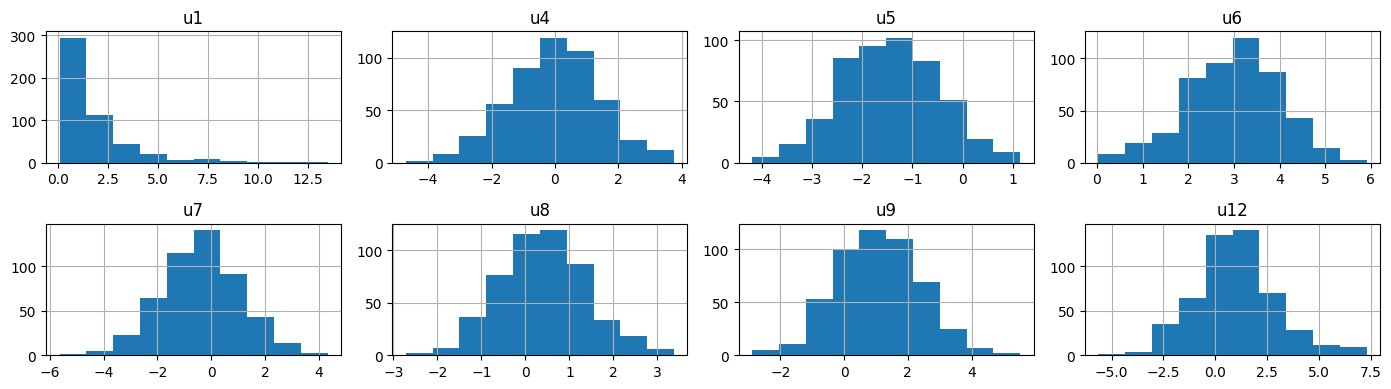

In [6]:
_, axes = plt.subplots(nrows=2, ncols=int(np.ceil(len(num_cols)//2)), figsize=figsize)
for ax, cname in zip(axes.ravel(), num_cols):
    data.hist(cname, ax=ax)
plt.tight_layout()

Most of them seem to follow a Normal distribution

## Checking the Distributions

**Let's check the distribution of the _binary_ candidate correlates**

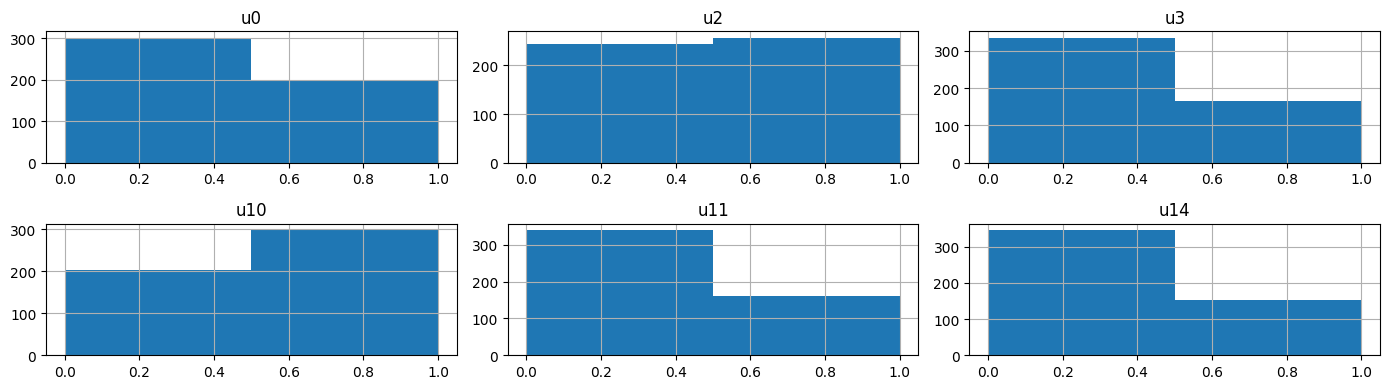

In [7]:
_, axes = plt.subplots(nrows=2, ncols=int(np.ceil(len(cat_cols)//2)), figsize=figsize)
for ax, cname in zip(axes.ravel(), cat_cols):
    data.hist(cname, ax=ax, bins=2)
plt.tight_layout()

Some are well balanced, othere less so

## Checking the Distributions

**Let's check the _target_ distribution**

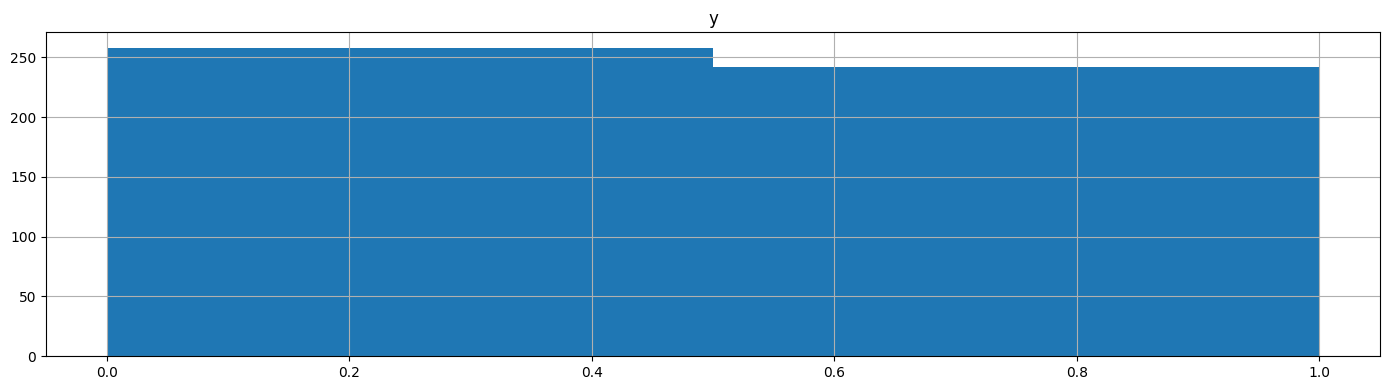

In [8]:
data.hist('y', bins=2, figsize=figsize)
plt.tight_layout()

The target distribution is quite balanced

## Checking Univariate Dependencies

**Let's check the fraction of $Y=1$ for the _categorical_ candidates**

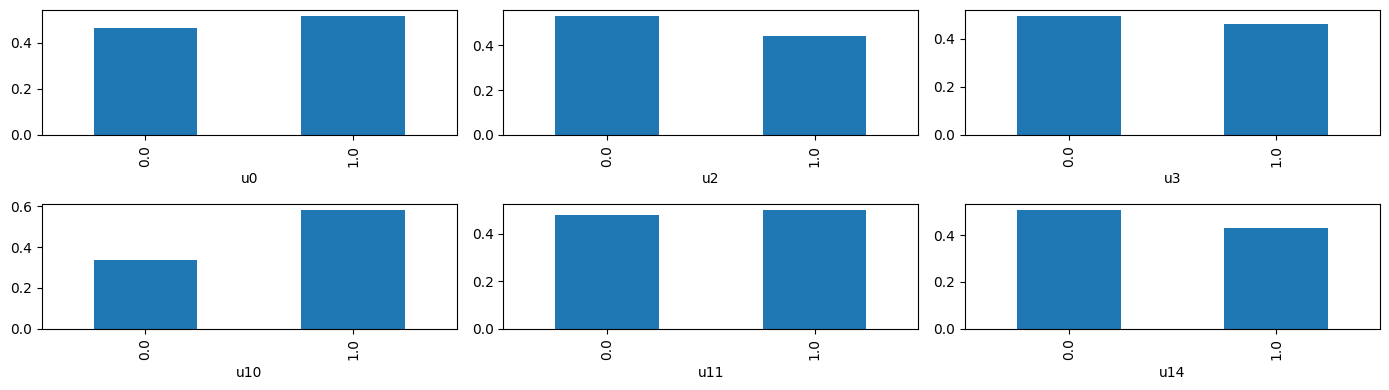

In [9]:
_, axes = plt.subplots(nrows=2, ncols=int(np.ceil(len(cat_cols)//2)), figsize=figsize)
for ax, cname in zip(axes.ravel(), cat_cols):
    data.groupby(cname)['y'].mean().plot.bar(ax=ax)
plt.tight_layout()

A few of them seems to have a correlation, other cases are less clear

## Checking Univariate Dependencies

**Let's check the fraction of $y=1$ for the _numerical_ candidates**

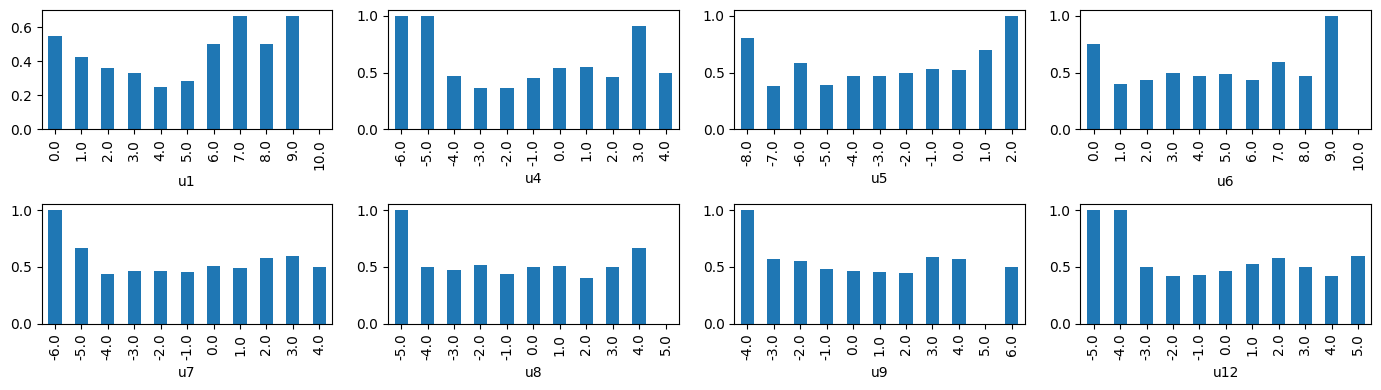

In [10]:
_, axes = plt.subplots(nrows=2, ncols=int(np.ceil(len(num_cols)//2)), figsize=figsize)
for ax, cname in zip(axes.ravel(), num_cols):
    bin_size = (data[cname].max() - data[cname].min()) / 10
    data['y'].groupby(data[cname] // bin_size).mean().plot.bar(ax=ax)
plt.tight_layout()

Most of them appear to have some non-linear correlation

## Checking Linear Correlations

**It's worth checking how all features are correlated**

One way to do it is by plotting a correlation matrix (e.g. Pearson)

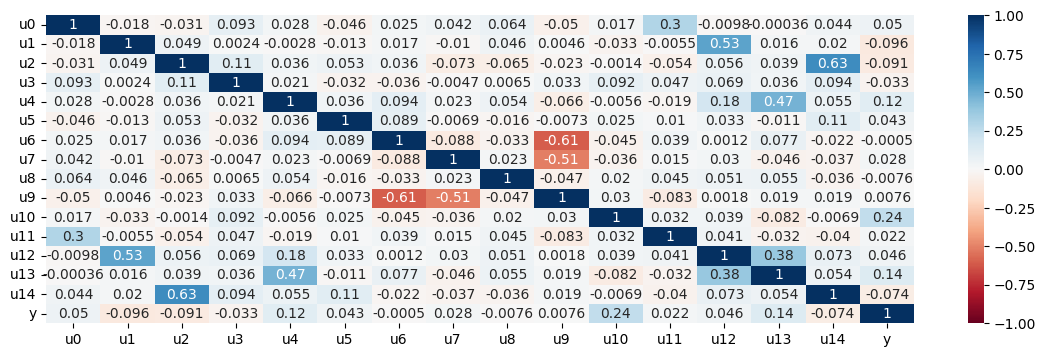

In [11]:
plt.figure(figsize=figsize)
sn.heatmap(data.corr(method='pearson'), annot=True, vmin=-1, vmax=1, cmap='RdBu');

* Sparse correlations in general, weak (linear) correlations for $Y$

<div class=big>
    <span class=small>So far we have just inspected our dataset, but...</span><br>
    what is exactly our goal?
</div>

## Use Case Objective

**Unlike in classical ML tasks, we don't have an _estimation_ problem**

Rather, our goal is _understanding_ the process behind the data

* We want to identify the true _correlates_ among our candidates
* We want to see _how_ they are linked to the target $y$

**In an ideal world, we'd like to know about _causal_ relationships**

...But in practice, we'll need to be happy with correlations

* Studying causality is indeed possible (a good start is [Judea Pearl's book](https://www.cambridge.org/core/journals/econometric-theory/article/causality-models-reasoning-and-inference-by-judea-pearl-cambridge-university-press-2000/DA2D9ABB0AD3DAC95AE7B3081FCDF139))
* ...But also very challenging, and there's no general and real-world ready tool available

So, we'll count on the domain expert to check the correlations

## Use Case Objective

**Our setup also explains a quirk in the dataset**

All variables except the target are called $U_j$, for "unknown"

* This is synthetic data, so nothing is really unknown
* In fact, the ground truth process linking $Y$ to $U$ is avaialable

**However, for the sake of the lecture, such process will be hidden**

* We will analyze the data pretending we have no such knowledge
* _At the end_ of our exercise we'll check the ground truth

...And we'll see how close we got to the truth!